In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# **Final results**

In [38]:
def plot_line_graph(csv_file, mode="Train", timesteps=None, start_step=0, column_to_plot="Reward", cumulative=True):
    df = pd.read_csv(csv_file)
    timesteps = len(df) if timesteps == None else timesteps
    df = df.iloc[start_step:start_step + timesteps + 1, ]
    if cumulative:
        df[f"Cumulative {column_to_plot}"] = df[column_to_plot].cumsum()
        column_to_plot = f"Cumulative {column_to_plot}"
    plt.figure(figsize=(16, 4))
    if mode == "Validation":
        color = "orange"
    else:
        color = "royalblue"
    plt.plot(df[column_to_plot], linestyle='-', label=column_to_plot, color=color)
    plt.title(f"{mode} {column_to_plot}", fontsize=16)
    plt.xlabel("Timestep", fontsize=12)
    plt.ylabel(column_to_plot, fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

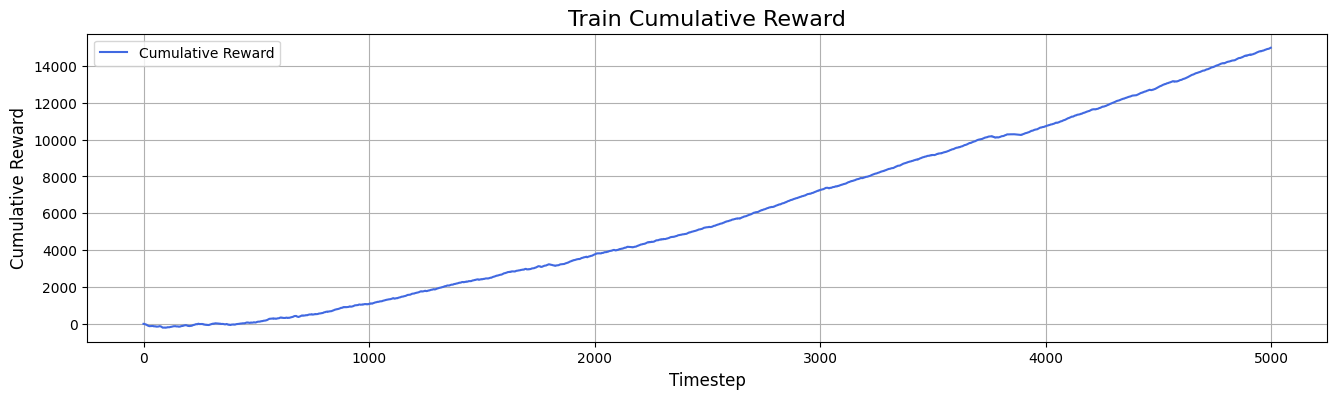

In [39]:
plot_line_graph('train_arena_obstacles.csv', mode="Train")

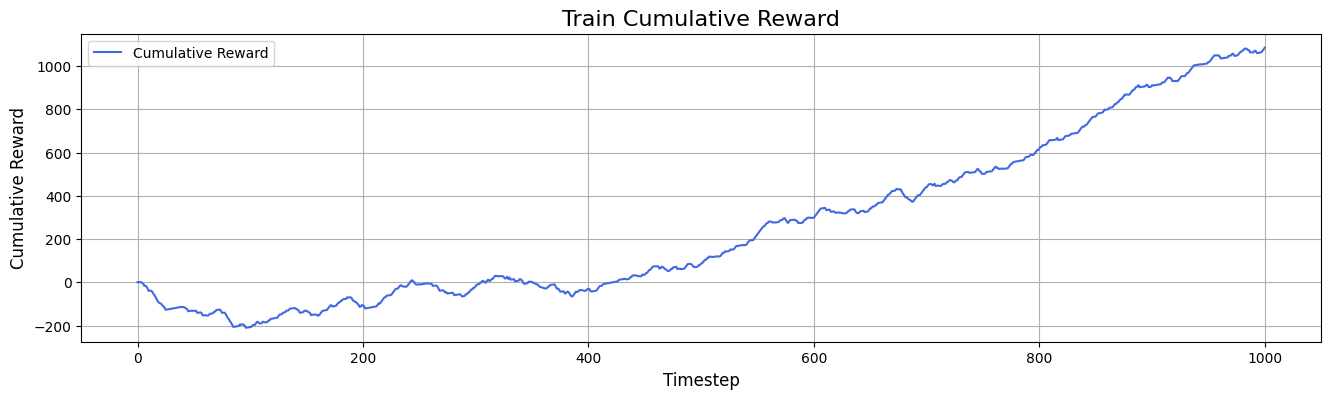

In [40]:
plot_line_graph('train_arena_obstacles.csv', mode="Train", timesteps=1000)

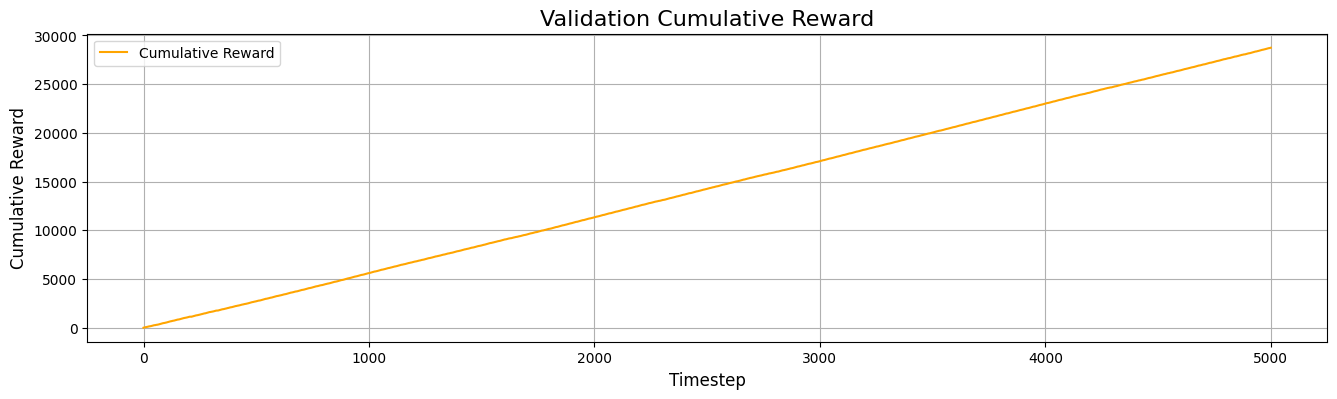

In [41]:
plot_line_graph('test_arena_obstacles_validation_1.csv', mode="Validation")

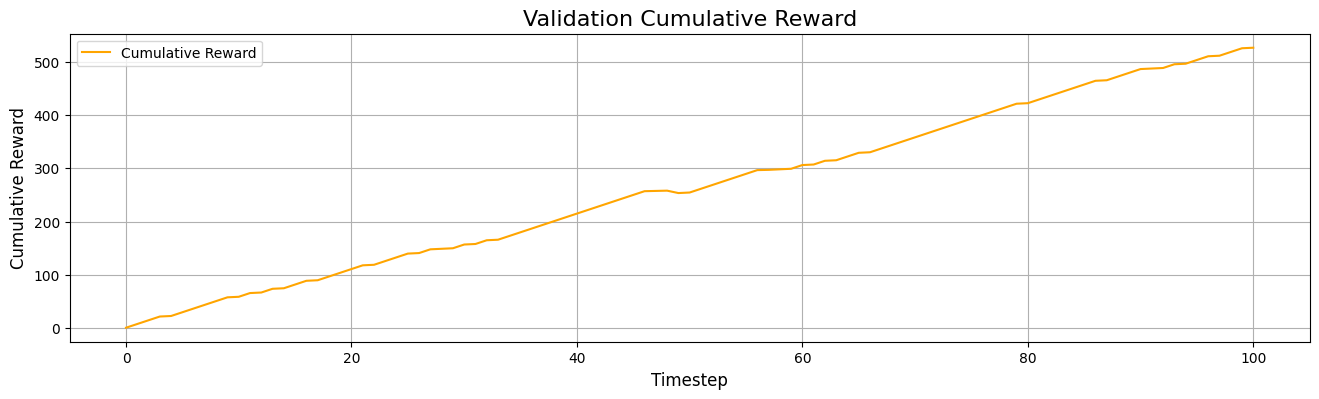

In [42]:
plot_line_graph('test_arena_obstacles_validation_1.csv', mode="Validation", timesteps=100)

In [46]:
# Example of collision
validation = pd.read_csv('test_arena_obstacles_validation_1.csv')
validation[validation.State0 == "collision"]

,Time,Mode,FrontLL,FrontL,FrontC,FrontR,FrontRR,State0,State1,Action,Reward
211,158243.0,test,126.803360,52.254387,5.842649,52.255859,10.115829,collision,NFO,forward,-10.0
212,159348.0,test,118.101265,52.253895,5.842755,52.258068,10.626626,collision,NFO,forward,-10.0
328,237386.0,test,107.237755,52.263866,5.844797,52.268181,10.339109,collision,NFO,forward,-10.0
1629,1173137.0,test,102.639786,52.270081,5.845602,52.269810,5.890788,collision,NFO,forward,-10.0


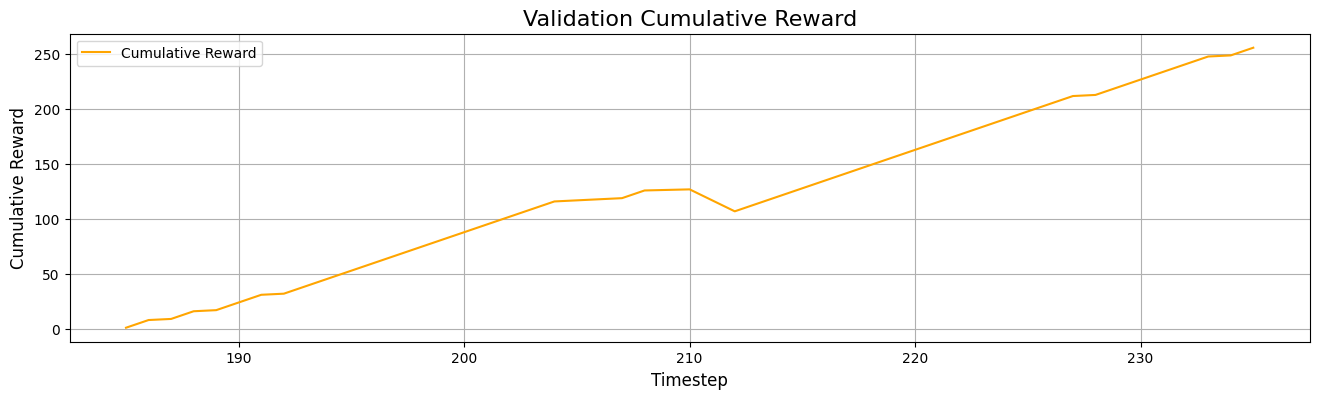

In [48]:
# Example of collision
plot_line_graph('test_arena_obstacles_validation_1.csv', mode="Validation", timesteps=50, start_step=185)

In [49]:
def combine_tests(file_pattern, timesteps=None, start_step=0, column_to_plot="Reward", cumulative=True):
    initial_column = column_to_plot
    test_files = glob.glob(f"{file_pattern}*.csv")
    all_data = []

    for file in test_files:
        column_to_plot = initial_column

        df = pd.read_csv(file)
        timesteps = len(df) if timesteps == None else timesteps
        df = df.iloc[start_step:start_step + timesteps + 1, ]

        if cumulative:
            df[f"Cumulative {column_to_plot}"] = df[column_to_plot].cumsum()
            column_to_plot = f"Cumulative {column_to_plot}"
        all_data.append(df[column_to_plot].values)

    matrix_data = np.array(all_data)  # Shape: (num_files, num_samples_per_file)
    return matrix_data

In [51]:
def plot_validation_CI(file_pattern, timesteps=None, start_step=0, column_to_plot="Reward", cumulative=True):
    matrix_data = combine_tests(file_pattern, timesteps=timesteps, start_step=start_step,
                                column_to_plot=column_to_plot, cumulative=cumulative)

    # Calculate mean and confidence intervals (CI)
    mean_values = np.mean(matrix_data, axis=0)
    std_values = np.std(matrix_data, axis=0)
    ci_95 = 1.96 * (std_values / np.sqrt(matrix_data.shape[0]))  # 95% CI

    plt.figure(figsize=(16, 4))
    x = range(start_step, start_step + len(mean_values))
    plt.plot(x, mean_values, label=f"Validation Average {column_to_plot}", color="green")
    plt.fill_between(x,
                    mean_values - ci_95,
                    mean_values + ci_95,
                    color="green", alpha=0.2, label="95% CI")
    plt.title(f"Validation Average {column_to_plot} with Confidence Intervals", fontsize=16)
    plt.xlabel("Timesteps", fontsize=14)
    plt.ylabel(column_to_plot, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

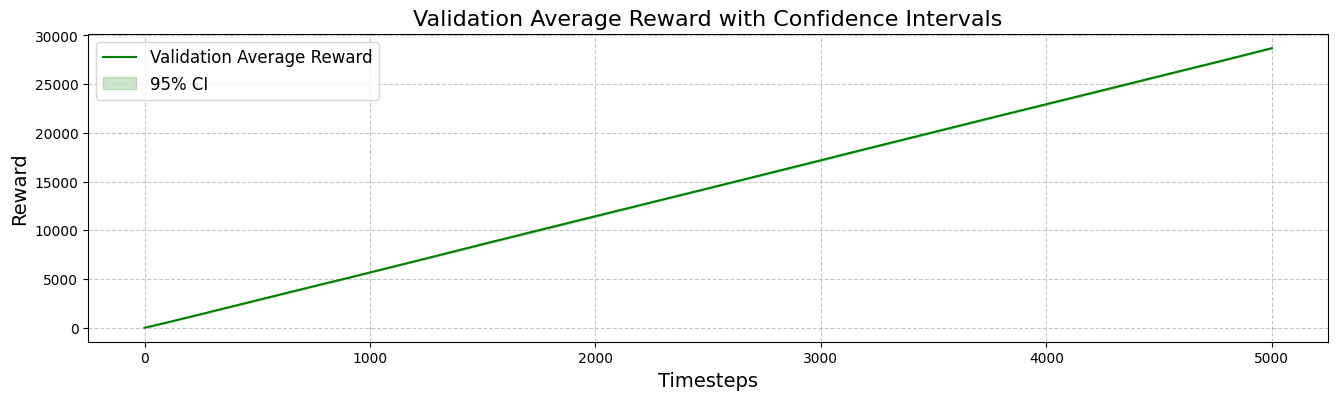

In [52]:
plot_validation_CI("test_arena_obstacles_validation_")

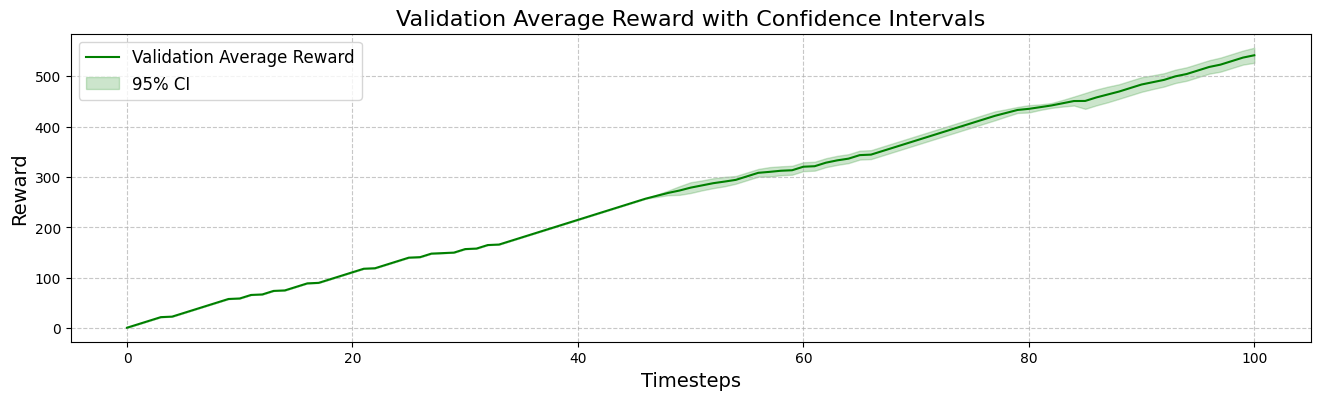

In [53]:
plot_validation_CI("test_arena_obstacles_validation_", timesteps=100)

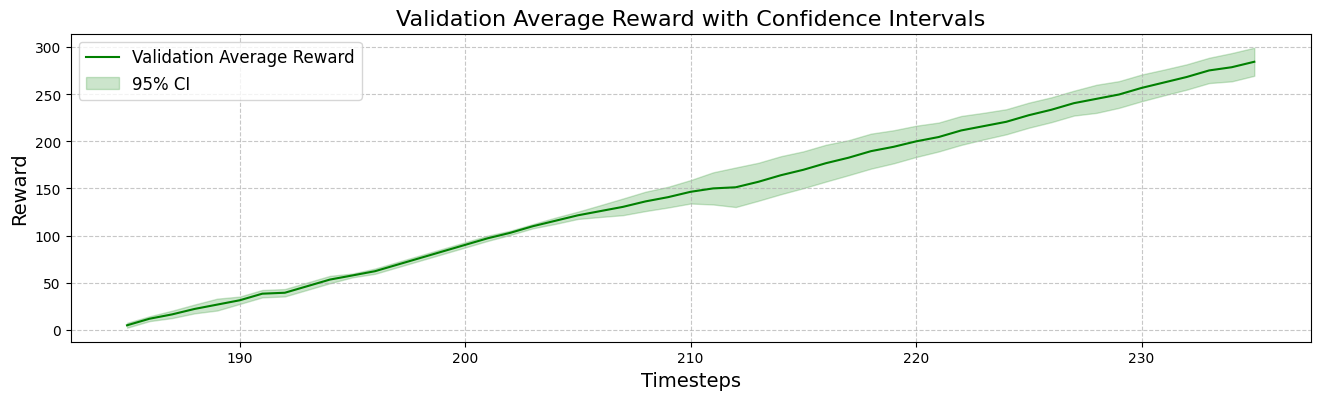

In [54]:
# Example of collision
plot_validation_CI("test_arena_obstacles_validation_", timesteps=50, start_step=185)

In [57]:
def plot_test_validation(train_csv, test_file_pattern, timesteps=None, start_step=0, column_to_plot="Reward", cumulative=True):
    train = pd.read_csv(train_csv)
    timesteps = len(train) if timesteps == None else timesteps
    train = train.iloc[start_step:start_step + timesteps + 1, ]

    test_matrix_data = combine_tests(test_file_pattern, timesteps=timesteps, start_step=start_step,
                                     column_to_plot=column_to_plot, cumulative=cumulative)
    if cumulative:
        train[f"Cumulative {column_to_plot}"] = train[column_to_plot].cumsum()
        column_to_plot = f"Cumulative {column_to_plot}"

    # Calculate mean and confidence intervals (CI)
    mean_values = np.mean(test_matrix_data, axis=0)
    std_values = np.std(test_matrix_data, axis=0)
    ci_95 = 1.96 * (std_values / np.sqrt(test_matrix_data.shape[0]))

    plt.figure(figsize=(16, 4))
    plt.plot(train[column_to_plot], linestyle='-', label=f"Test {column_to_plot} (arena_obstacles.ttt)", color="royalblue")

    x = range(start_step, start_step + len(mean_values))
    plt.plot(x, mean_values, label=f"Validation Average {column_to_plot} (arena_obstacles_validation.ttt)", color="green")
    plt.fill_between(x,
                    mean_values - ci_95,
                    mean_values + ci_95,
                    color="green", alpha=0.2, label="95% CI")

    plt.title(f"Test vs Validation {column_to_plot} Comparison", fontsize=16)
    plt.xlabel("Timesteps", fontsize=14)
    plt.ylabel(column_to_plot, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

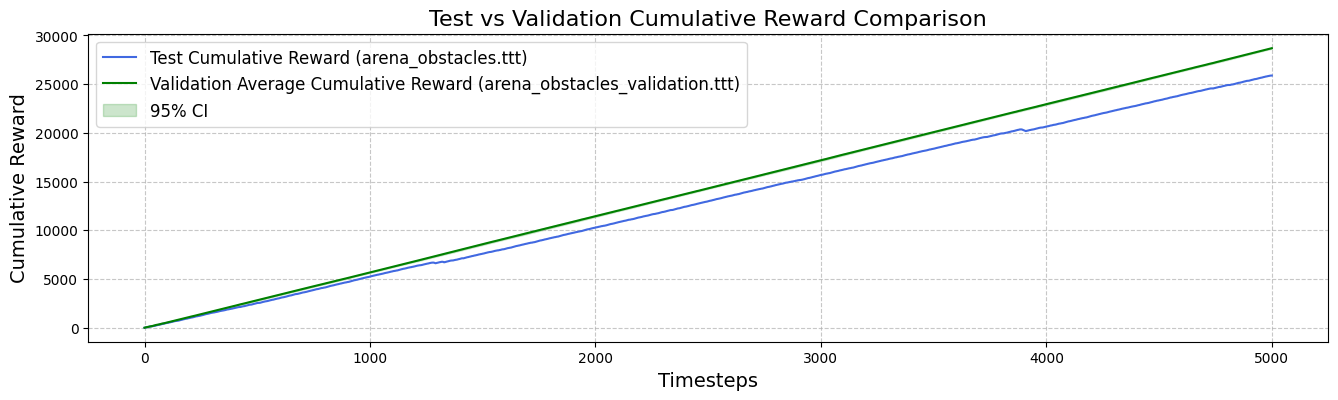

In [58]:
# For fair results, compare fitness functions, not rewards
plot_test_validation('test_arena_obstacles.csv', "test_arena_obstacles_validation_")

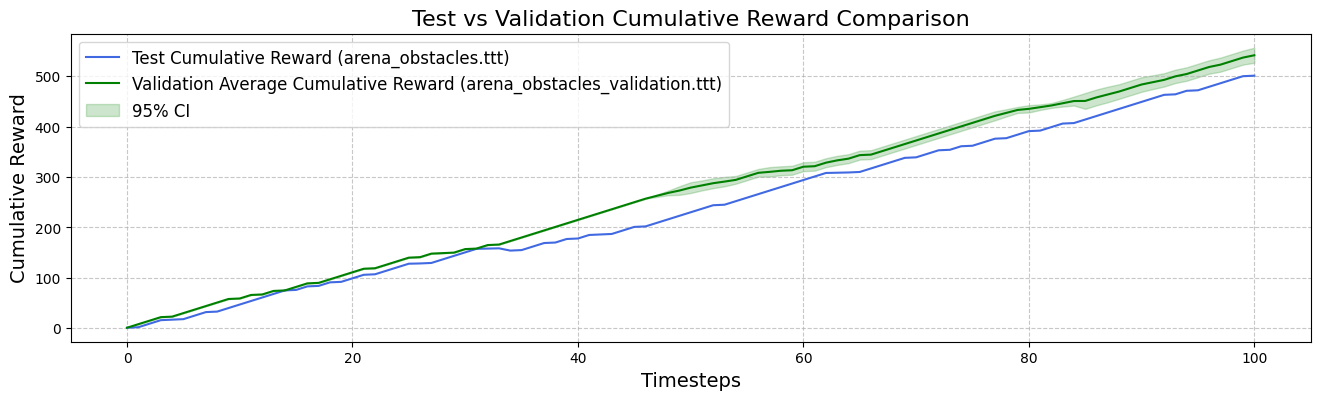

In [61]:
# For fair results, compare fitness functions, not rewards
plot_test_validation('test_arena_obstacles.csv', "test_arena_obstacles_validation_", timesteps=100)